In [1]:
import healpy as hp
import numpy as np
import pickle as pk
import os
import matplotlib.pyplot as plt

In [2]:
nside = 2048
nlev_t_lb = 1.52
nlev_p_lb = 2.16
beam_lb = 30
nlev_t_s4 = 1.5
nlev_p_s4 = 2.12
beam_s4 = 1.5

In [3]:
scr = '/project/projectdirs/litebird/simulations/'
lbpath = os.path.join(scr,'S4BIRD','LiteBird_s4mask','NoiseAlm')
s4path = os.path.join(scr,'S4BIRD','CMBS4','NoiseAlm')

In [4]:
almLB = hp.read_alm(os.path.join(lbpath,'noiseonly_0.fits'),hdu=(1,2,3))
almS4 = hp.read_alm(os.path.join(s4path,'noiseonly_0.fits'),hdu=(1,2,3))

In [5]:
lb0 = hp.alm2cl(almLB[0])
lb1 = hp.alm2cl(almLB[1])
lb2 = hp.alm2cl(almLB[2])

In [6]:
s40 = hp.alm2cl(almS4[0])
s41 = hp.alm2cl(almS4[1])
s42 = hp.alm2cl(almS4[2])

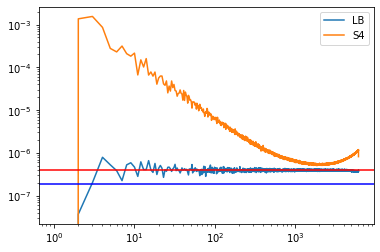

In [7]:
plt.loglog(lb1,label='LB')
plt.loglog(s41,label='S4')
plt.axhline(np.radians(2.15/60)**2,c='r')
plt.axhline(np.radians(1.5/60)**2,c='b')
plt.legend()

In [8]:
bl_s4 =  hp.gauss_beam(np.radians(beam_s4/60),lmax=6143)
bl_lb =  hp.gauss_beam(np.radians(beam_lb/60),lmax=6143)

In [9]:
w_lb_t = 1/(lb0/bl_lb**2)**2
w_lb_p = 1/(lb1/bl_lb**2)**2

/global/homes/l/lonappan/.conda/envs/PC/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in square
  """Entry point for launching an IPython kernel.
/global/homes/l/lonappan/.conda/envs/PC/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  
/global/homes/l/lonappan/.conda/envs/PC/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [10]:
w_s4_t = 1/(s40/bl_s4**2)**2
w_s4_p = 1/(s41/bl_s4**2)**2

/global/homes/l/lonappan/.conda/envs/PC/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [11]:
w_t  = w_s4_t + w_lb_t
w_p  = w_s4_p + w_lb_p

In [12]:
s4_t = w_s4_t/w_t
lb_t = w_lb_t/w_t

s4_p = w_s4_p/w_p
lb_p = w_lb_p/w_p

In [19]:
s4_p[0] = 0
s4_p[1] = 0

In [21]:
lb_p[0] = 1
lb_p[1] = 1

(1e-17, 5)

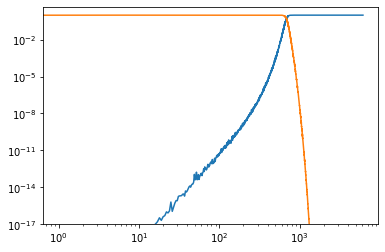

In [22]:
plt.loglog(s4_t)
plt.loglog(lb_t)
plt.ylim(10e-18,5)

(1e-17, 5)

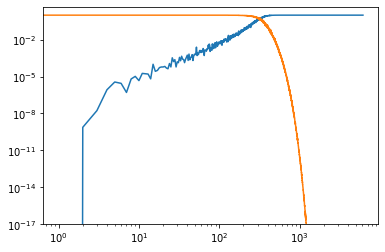

In [23]:
plt.loglog(s4_p)
plt.loglog(lb_p)
plt.ylim(10e-18,5)

In [24]:
data = {}
data["LB"] = {}
data["LB"]["T"] = lb_t
data["LB"]["P"] = lb_p
data["S4"] = {}
data["S4"]["T"] = s4_t
data["S4"]["P"] = s4_p

In [25]:
data

{'LB': {'T': array([9.6774269e-12, 1.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00]),
  'P': array([1., 1., 1., ..., 0., 0., 0.])},
 'S4': {'T': array([1.00000000e+00, 5.46088207e-26, 1.42606488e-24, ...,
         1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
  'P': array([0.00000000e+00, 0.00000000e+00, 7.41211271e-10, ...,
         1.00000000e+00, 1.00000000e+00, 1.00000000e+00])}}

In [26]:
pk.dump(data,open('../Data/weight.pkl','wb'))